# Task 6- Gayatri Bhatambarekar

# Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# COLLECTING DATA

In [2]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris.shape

(150, 6)

In [47]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# DATA ANALYSIS

<AxesSubplot:>

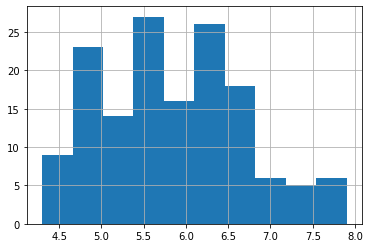

In [8]:
iris["SepalLengthCm"].hist()

<AxesSubplot:>

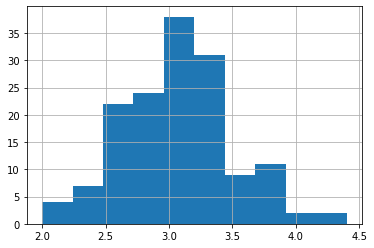

In [10]:
iris["SepalWidthCm"].hist()

<AxesSubplot:>

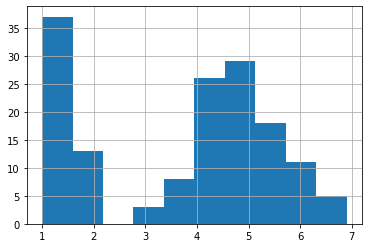

In [12]:
iris["PetalLengthCm"].hist()

<AxesSubplot:>

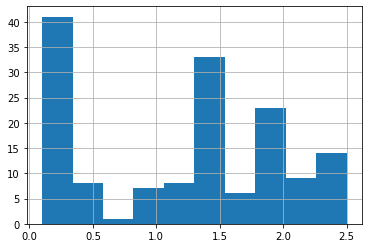

In [13]:
iris["PetalWidthCm"].hist()

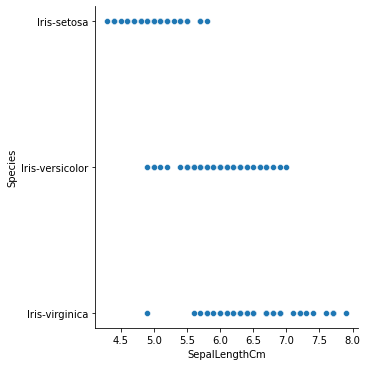

In [15]:
sns.relplot(x="SepalLengthCm",y="Species",data=iris)


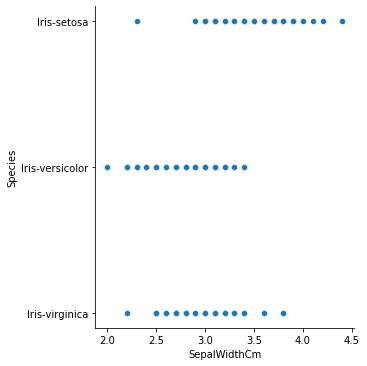

In [16]:
sns.relplot(x="SepalWidthCm",y="Species",data=iris)

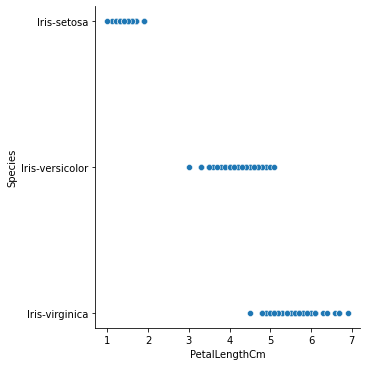

In [17]:
sns.relplot(x="PetalLengthCm",y="Species",data=iris)

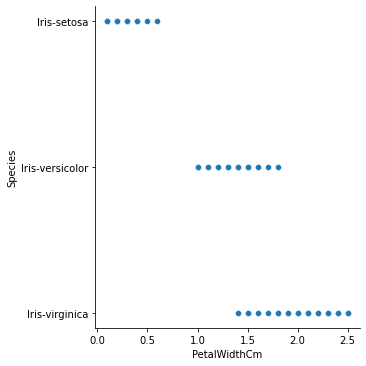

In [18]:
sns.relplot(x="PetalWidthCm",y="Species",data=iris)

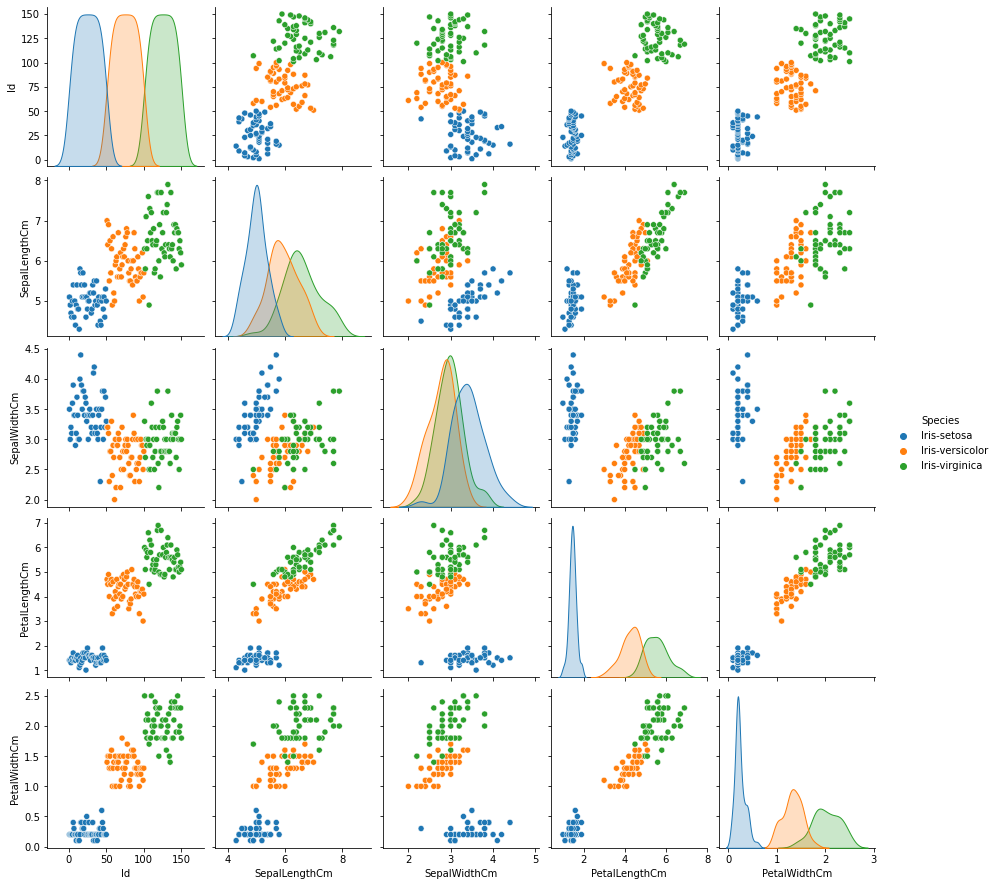

In [22]:
sns.pairplot(iris,hue="Species")

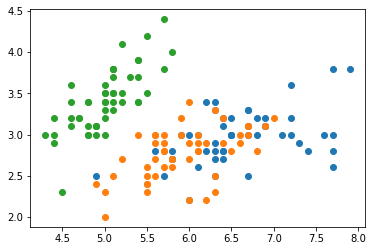

In [33]:
colors=['blue','yellow','red']
species=['Iris-virginica' ,'Iris-versicolor','Iris-setosa']
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],label=species[i])
    

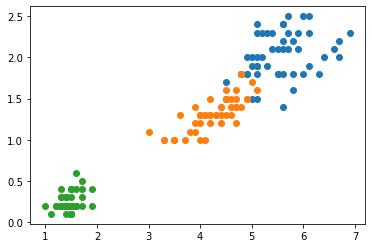

In [35]:
colors=['blue','yellow','red']
species=['Iris-virginica' ,'Iris-versicolor','Iris-setosa']
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],label=species[i])
    

In [39]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

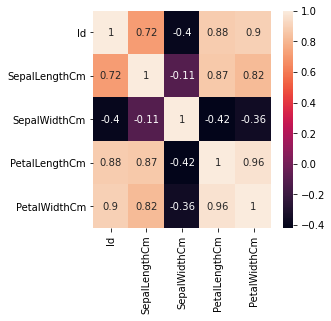

In [45]:
corelation=iris.corr()
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corelation,annot=True,ax=ax)

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# TRAINING AND TESTING OF DATA

In [8]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(iris,test_size=0.2)



In [9]:
train.shape,test.shape

((120, 6), (30, 6))

In [20]:
train_x=train[['SepalLengthCm' ,'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_x=test[['SepalLengthCm' ,'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y=test.Species

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [12]:
dtree=DecisionTreeClassifier()
dtree.fit(train_x,train_y)
pred=dtree.predict(test_x)
print("the accuracy of Decision tree is: ",metrics.accuracy_score(pred,test_y))

the accuracy of Decision tree is:  0.9333333333333333


In [ ]:
from sklearn import tree

In [31]:
!pip install graphviz

In [42]:
decision_tree=tree.export_graphviz(dtree,out_file="Tree.dot",feature_names=train_x.columns,max_depth=3,filled=True)

In [43]:
!dot -Tpng tree.dot -o tree.png

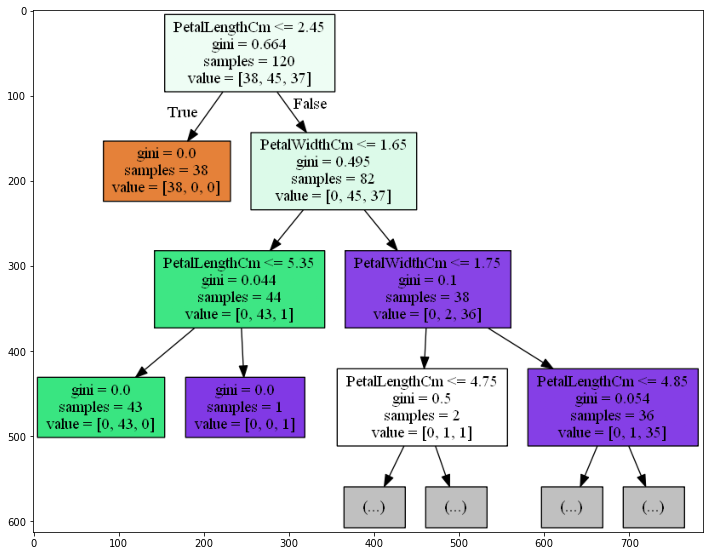

In [44]:
image=plt.imread("tree.png")
plt.figure(figsize=(12,12))
plt.imshow(image)